In [2]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml("mnist_784")


In [3]:
import os
def get_png_files():
    print(os.getcwd())  # /home/cicek/PycharmProjects/image_processing
    print(os.listdir())
    path = os.getcwd()
    jpg_files = [f for f in os.listdir(path) if f.endswith('.jpeg')]
    print(jpg_files)  # ['figure_1.png', 'pic_1.jpg']

    # im_1 = plt.imread(jpg_files[0])
    # print(im_1.shape)  # (480, 640, 4)
    # print(im_1.ndim)  # 3

    os.getcwd()
    os.listdir()
    return jpg_files

In [5]:
X, y = dataset["data"], dataset["target"]
X.shape

(70000, 784)

In [3]:
X=X/255

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
digits = 10
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [7]:
Y_new

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
Y_new.shape

(10, 70000)

In [9]:
Y_new[:,100]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [10]:
y[0,100]

'5'

In [11]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

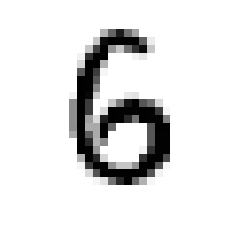

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [12]:
i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[:,i]

In [13]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [14]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  8.68017797397721
Epoch 100 cost:  0.7346335215333898
Epoch 200 cost:  0.550914663980822
Epoch 300 cost:  0.47012310889471687
Epoch 400 cost:  0.42173434985276836
Epoch 500 cost:  0.3888250653276407
Epoch 600 cost:  0.3644737600776509
Epoch 700 cost:  0.3453270591967709
Epoch 800 cost:  0.3296499399657871
Epoch 900 cost:  0.31642482685801654
Epoch 1000 cost:  0.3050110771238768
Epoch 1100 cost:  0.29498146376080625
Epoch 1200 cost:  0.286037112645072
Epoch 1300 cost:  0.27796393080088294
Epoch 1400 cost:  0.2706064768811853
Epoch 1500 cost:  0.26385148146910187
Epoch 1600 cost:  0.2576152591943105
Epoch 1700 cost:  0.2518326981208433
Epoch 1800 cost:  0.2464495782388876
Epoch 1900 cost:  0.24141934509382199
Final cost: 0.23674748373201565


In [16]:
from sklearn.metrics import classification_report
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 954    0    8    3    2   11    7    1    8    6]
 [   0 1110    9    1    3    1    3    8    4    6]
 [   2    7  919   20    7    9    7   21   10    2]
 [   2    3   19  924    1   45    2    4   30   11]
 [   2    0   12    0  908    8   13    9    7   43]
 [   8    2    7   29    1  777   15    1   19    6]
 [   7    3   12    3   10   11  904    0   11    0]
 [   2    1   13   10    2    4    3  953    6   19]
 [   2    9   29   16    9   22    4    5  866   16]
 [   1    0    4    4   39    4    0   26   13  900]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1000
           1       0.98      0.97      0.97      1145
           2       0.89      0.92      0.90      1004
           3       0.91      0.89      0.90      1041
           4       0.92      0.91      0.92      1002
           5       0.87      0.90      0.88       865
           6       0.94      0.94      0.94       961
           7       0.93      0.94   

In [17]:
dataset

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [20]:
type(dataset)

sklearn.utils.Bunch

In [10]:
jpg = get_png_files()
jpg


C:\Users\Oguz
['.android', '.conda', '.condarc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.thumbnails', '160401050', '3D Objects', '7b9.jpg', 'AMDRM_Install.log', 'AMD_RyzenMaster.log', 'ansel', 'AppData', 'Application Data', 'cameraman.jpg', 'cameramanCat.jpg', 'cat.jpg', 'cat22.jpg', 'cat23.jpg', 'cat25.jpg', 'CLionProjects', 'Contacts', 'Cookies', 'd.png', 'Desktop', 'Dilation.ipynb', 'Documents', 'Downloads', 'Favorites', 'hafta1.ipynb', 'hafta2.ipynb', 'hafta3.ipynb', 'intensityInverseExampleAndGamaCorrection.ipynb', 'Links', 'Local Settings', 'medianFilter.ipynb', 'MidtermExamples.ipynb', 'multiclass.ipynb', 'multiclass_NN_LR.ipynb', 'Music', 'My Documents', 'MyFirstGame', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TM.blf', 'NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TMContainer000000000000

[]

In [9]:
jpg[8]

IndexError: list index out of range

In [11]:
jpg

[]

In [1]:
X.shape


NameError: name 'X' is not defined

In [10]:
type(X)

numpy.ndarray

In [11]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])